# Spatial Relationships: Joins

In [19]:
%matplotlib inline
import geopandas

In [2]:
countries = geopandas.read_file("data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("data/ne_50m_rivers_lake_centerlines.zip")

An important aspect of geospatial data is that we can look at spatial relationships: how two spatial objects relate to each other (whether they overlap, intersect, contain etc.). The topological, set-theoretic relationships in GIS are typically based on the [DE-9IM](https://en.wikipedia.org/wiki/Spatial_relation) model. We create several spatial objects, a polygon, two points and a linestring.

In [3]:
belgium = countries.loc[countries['name'] == 'Belgium', 'geometry'].item()
paris = cities.loc[cities['name'] == 'Paris', 'geometry'].item()
brussels = cities.loc[cities['name'] == 'Brussels', 'geometry'].item()

In [4]:
from shapely.geometry import LineString
line = LineString([paris, brussels])

We want to visualize those geometry objects together using GeoSeries to be able to apply the .plot() method.

<Axes: >

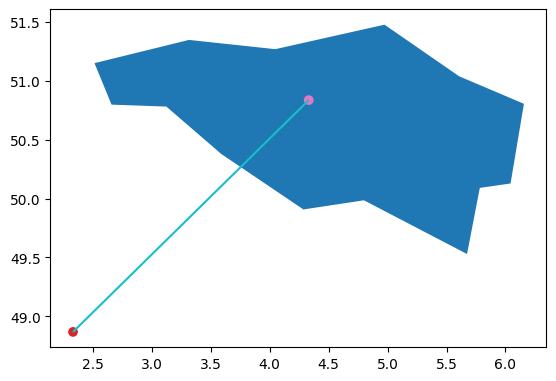

In [8]:
geopandas.GeoSeries([belgium, paris, brussels, line]).plot(cmap='tab10')

In [20]:
brussels.within(belgium) # True
belgium.contains(brussels) # True
line.intersects(belgium) # True

True

The same methods that are available on individual shapely geometries are also available as methods on GeoSeries / GeoDataFrame objects. For example, if we call the contains method on the world dataset with the paris point, it will do this spatial check for each country in the world dataframe:

In [26]:
countries.contains(paris) # This outputs a dataframe with a Boolean for each country.
countries[countries.contains(paris)]

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
55,FRA,France,Europe,67106161.0,2699000.0,"MULTIPOLYGON (((2.51357 51.14851, 2.65842 50.7..."


In [27]:
amazon = rivers[rivers['name'] == 'Amazonas'].geometry.item()
countries[countries.crosses(amazon)]  # or .intersects

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
22,BRA,Brazil,South America,207353391.0,3081000.0,"POLYGON ((-57.62513 -30.21629, -56.29090 -28.8..."
35,COL,Colombia,South America,47698524.0,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
124,PER,Peru,South America,31036656.0,410400.0,"POLYGON ((-69.52968 -10.95173, -68.66508 -12.5..."
